In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


#Loading Data from CSV

In [28]:
data=pd.read_csv('/content/sample_data/bike_sharing_daily.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Perform EDA,
Drop nonNumeric column like dteday & draw a heat map to visualize the *correlation*,
Draw  pair plot

In [29]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


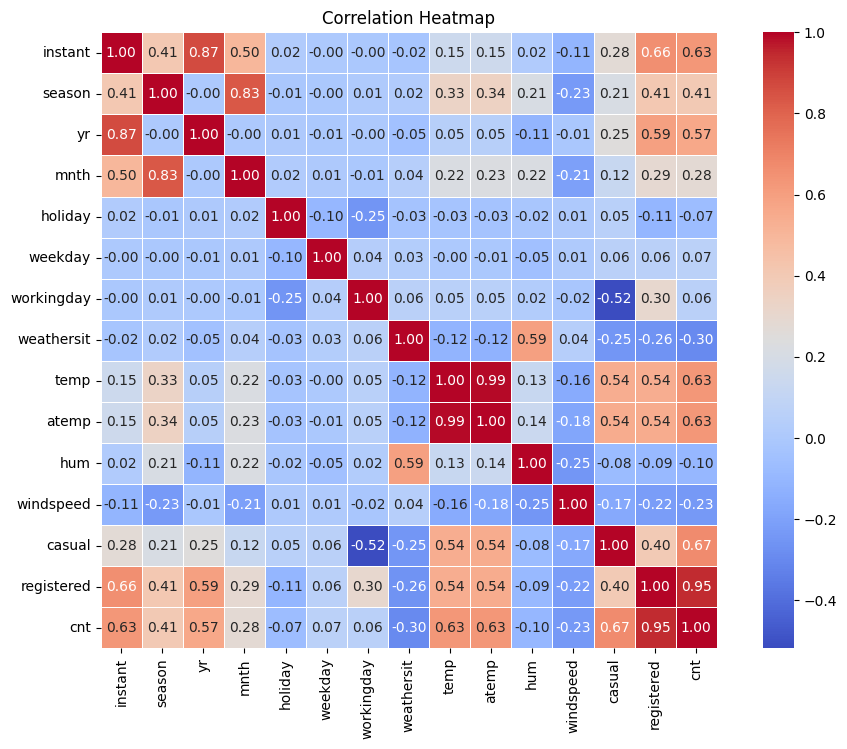

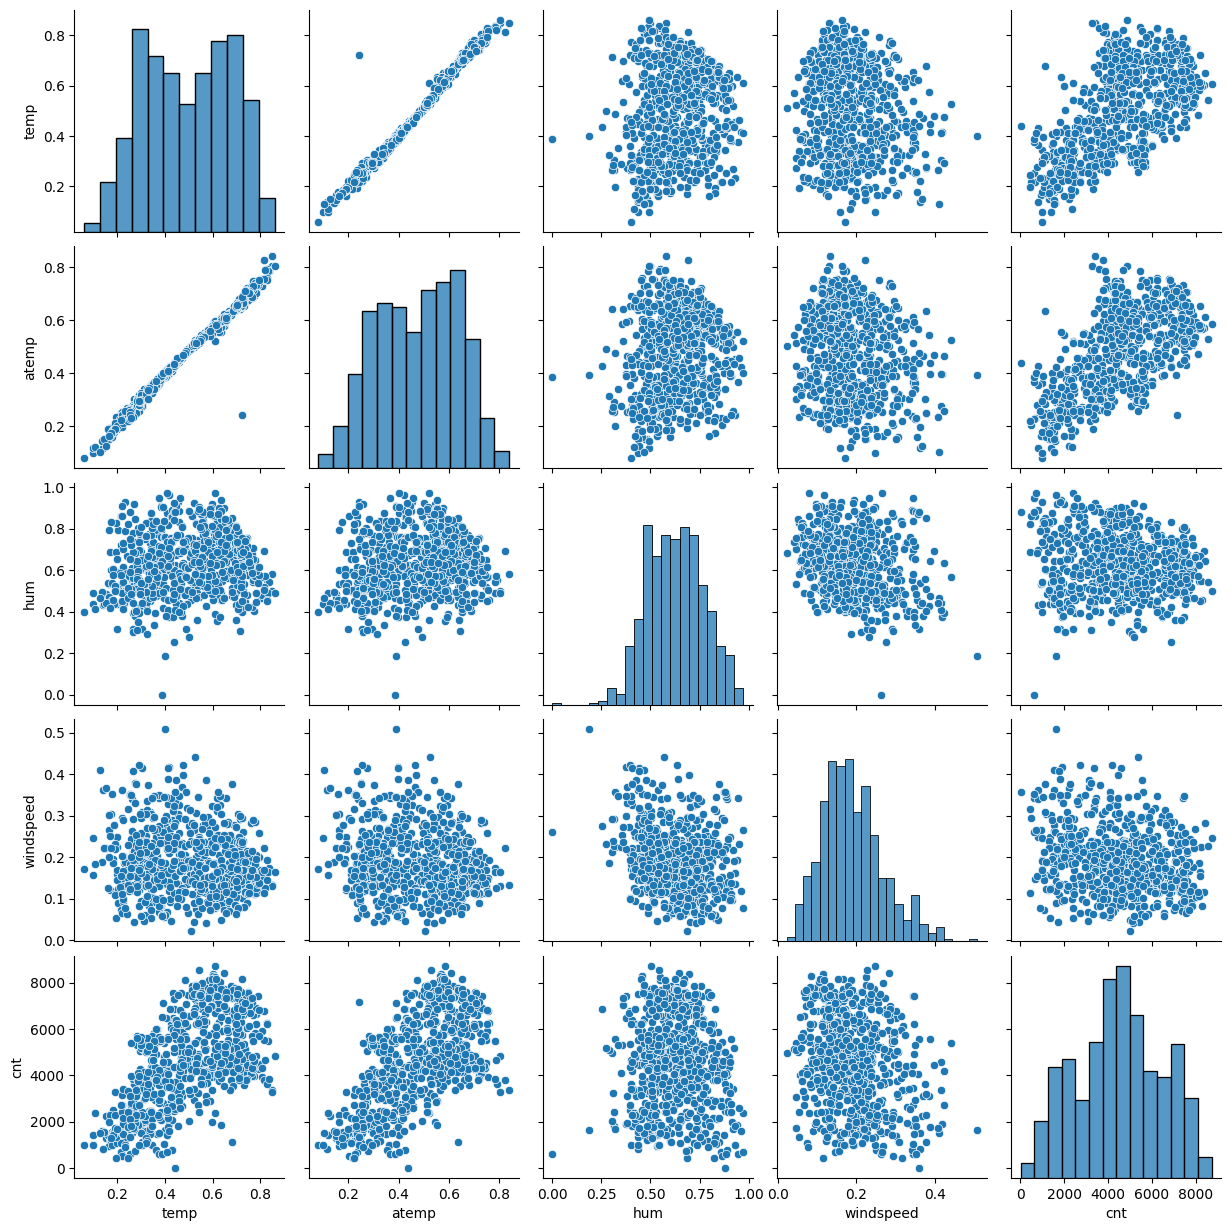

In [30]:
# Drop non-numeric column
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()
# draw a pair plot
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()



#Scatter Plot

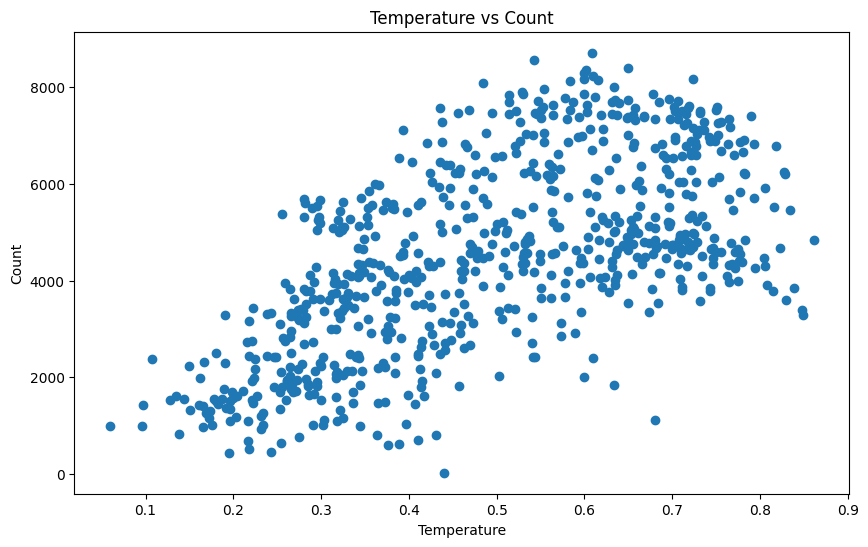

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(data['temp'],data['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.show()



Train a Simple Linear Regression model and calculate Rsquared

In [32]:

x=data[['temp']]
y=data['cnt']
model=LinearRegression()
model.fit(x,y)
slope=model.coef_[0]
intercept=model.intercept_

slope= 6640.7099985486375
intercept= 1214.6421190294013


Text(0.5, 1.0, 'Temperature vs Count')

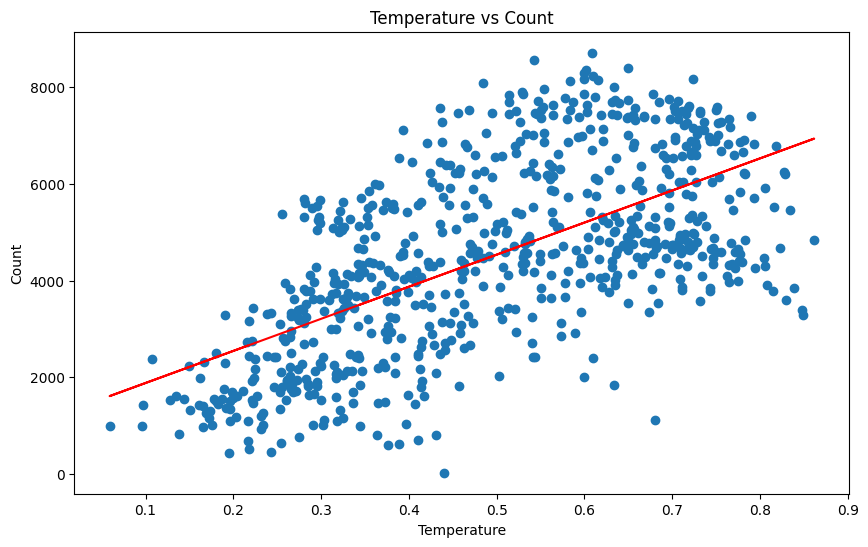

In [33]:
print("slope=",slope)
print("intercept=",intercept)
rg=slope*x+intercept
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,rg,color='red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% train, 20% test
r_squared=r2_score(y,rg)
print(r_squared)
r1=r2_score(y_test,model.predict(X_test))
print(r1)

0.3937487313729241
0.4054228545215135


#Multiple Linear regression

In [35]:

mx=data[['atemp','hum','windspeed']]
my=data['cnt']
model21=LinearRegression()
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(mx, my, test_size=0.2, random_state=42)  # 80% train, 20% test
model21.fit(X_train_multi,y_train_multi)
y_pred_multi=model21.predict(X_test_multi)
r2=r2_score(y_test_multi,y_pred_multi)
print(r2)


0.5006389192503209


2002379.1533060332


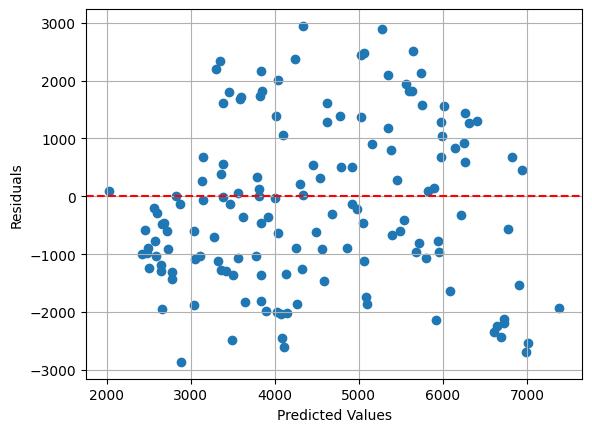

In [36]:
mse=mean_squared_error(y_test_multi,y_pred_multi)
print(mse)
residuals=y_test-y_pred_multi
plt.scatter(y_pred_multi,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#Non Linear Regression

In [37]:
data['temp2'] = data['temp'] ** 2
nx=data[['temp','temp2']]
ny=data['cnt']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(nx, ny, test_size=0.2, random_state=42)  # 80% train, 20% test
model3=LinearRegression()

model3.fit(X_train_poly,y_train_poly)
y_pred_poly=model3.predict(X_test_poly)
r3=r2_score(y_test_poly,y_pred_poly)
print(r3)

0.3936489111975031


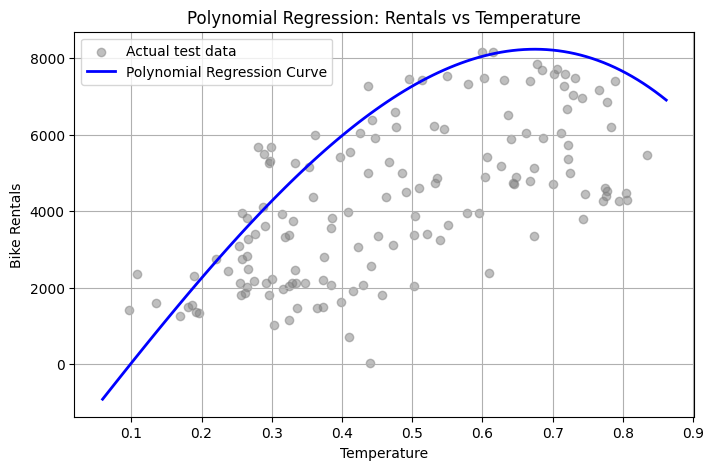

In [40]:
sorted_temp = np.linspace(data['temp'].min(), data['temp'].max(), 100)
sorted_temp2 = sorted_temp ** 2
X_plot = pd.DataFrame({'temp': sorted_temp, 'temp2': sorted_temp2})
y_plot = model3.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X_test['temp'], y_test, color='gray', alpha=0.5, label='Actual test data')
plt.plot(sorted_temp, y_plot, color='blue', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.title('Polynomial Regression: Rentals vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

#compare Rsquare for SLR , MLR & Non Linear regression model

In [39]:



print("SLR-",r_squared)
print("MLR-",r2)
print("PLR-",r3)

SLR- 0.3937487313729241
MLR- 0.5006389192503209
PLR- 0.3936489111975031


By observing R sqaured we can conclude MLR model gives the best performance